[https://docs.arbor-sim.org/en/stable/tutorial/single_cell_model.html](https://docs.arbor-sim.org/en/stable/tutorial/single_cell_model.html)

In [13]:
import arbor

In [14]:
# (1) Create a morphology with a single (cylindrical) segment of length=diameter=6 μm
tree = arbor.segment_tree()
tree.append(arbor.mnpos, arbor.mpoint(-3, 0, 0, 3), arbor.mpoint(3, 0, 0, 3), tag=1)

# (2) Define the soma and its midpoint
labels = arbor.label_dict({'soma':   '(tag 1)',
                           'midpoint': '(location 0 0.5)'})

# (3) Create and set up a decor object
decor = arbor.decor()
decor.set_property(Vm=-40)
decor.paint('"soma"', arbor.density('hh'))
decor.place('"midpoint"', arbor.iclamp( 10, 2, 0.8), "iclamp")
decor.place('"midpoint"', arbor.spike_detector(-10), "detector")

# (4) Create cell and the single cell model based on it
cell = arbor.cable_cell(tree, labels, decor)

In [15]:
type(cell)

arbor._arbor.cable_cell

In [16]:
isinstance(cell, arbor._arbor.cable_cell)

True

In [17]:
# (5) Make single cell model.
m = arbor.single_cell_model(cell)

In [18]:
type(m)

arbor._arbor.single_cell_model

In [11]:
# (6) Attach voltage probe sampling at 10 kHz (every 0.1 ms).
m.probe('voltage', '"midpoint"', frequency=10)

# (7) Run simulation for 30 ms of simulated activity.
m.run(tfinal=30)

In [4]:
# (8) Print spike times.
if len(m.spikes)>0:
    print('{} spikes:'.format(len(m.spikes)))
    for s in m.spikes:
        print('{:3.3f}'.format(s))
else:
    print('no spikes')

1 spikes:
10.084


In [7]:
import matplotlib.pyplot as plt

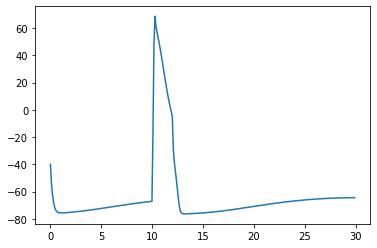

In [10]:
plt.plot(m.traces[0].time, m.traces[0].value)
plt.show()